
[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


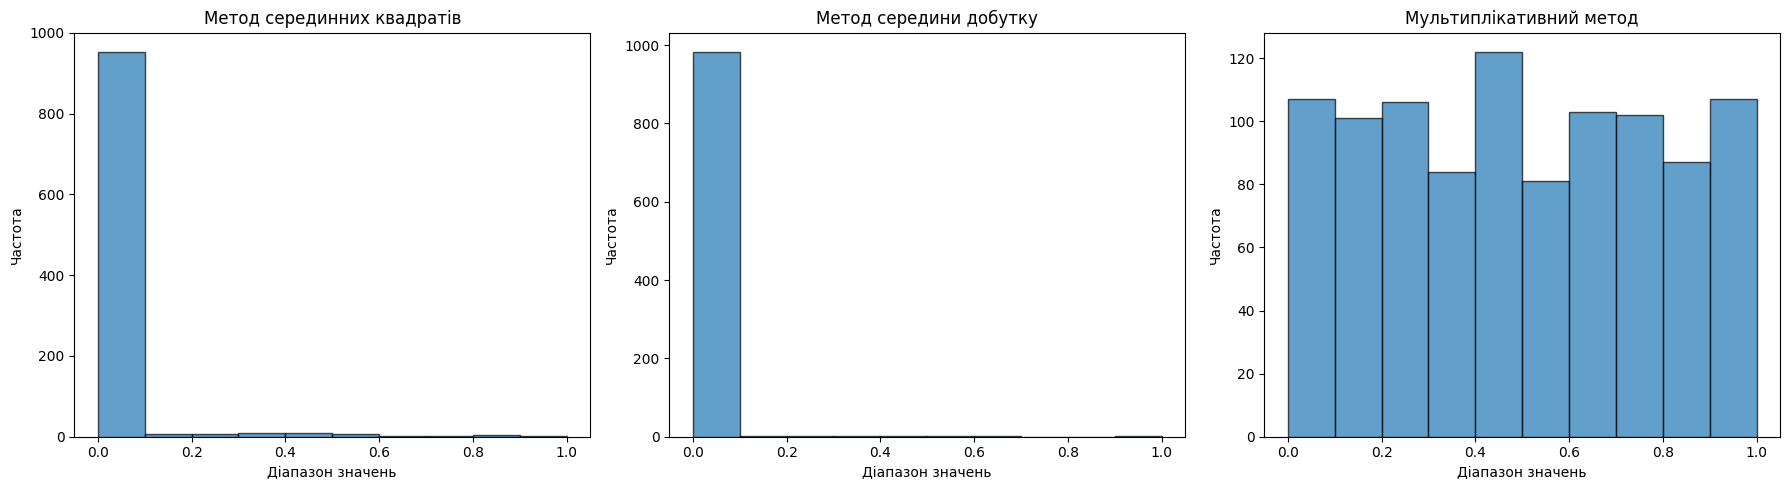


--- Метод серединних квадратів ---
Функція для тесту випадковості (перевірка серій): 2 runs
Тест рівномірності (χ²-тест): Статистика = 8085.2200, p-value = 0.0000
Тест Колмогорова-Смирнова: Статистика = 0.9455, p-value = 0.0000

--- Метод середини добутку ---
Функція для тесту випадковості (перевірка серій): 2 runs
Тест рівномірності (χ²-тест): Статистика = 8663.3200, p-value = 0.0000
Тест Колмогорова-Смирнова: Статистика = 0.9798, p-value = 0.0000

--- Мультиплікативний метод ---
Функція для тесту випадковості (перевірка серій): 510 runs
Тест рівномірності (χ²-тест): Статистика = 14.1800, p-value = 0.1161
Тест Колмогорова-Смирнова: Статистика = 0.0217, p-value = 0.7248


In [6]:
!pip install numpy matplotlib scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, kstest

def middle_square_method(seed, n):
    numbers = []
    num = seed
    for _ in range(n):
        squared = str(num ** 2).zfill(8)
        middle = int(squared[len(squared)//2-2:len(squared)//2+2])
        numbers.append(middle / 10000)
        num = middle
    return numbers

def middle_product_method(seed1, seed2, n):
    numbers = []
    num1, num2 = seed1, seed2
    for _ in range(n):
        product = str(num1 * num2).zfill(8)
        middle = int(product[len(product)//2-2:len(product)//2+2])
        numbers.append(middle / 10000)
        num1, num2 = num2, middle
    return numbers

def multiplicative_method(seed, a, c, m, n):
    numbers = []
    num = seed
    for _ in range(n):
        num = (a * num + c) % m
        numbers.append(num / m)
    return numbers

def runs_test(sequence):
    median = np.median(sequence)
    runs, prev = 0, None
    for x in sequence:
        curr = x > median
        if curr != prev:
            runs += 1
        prev = curr
    return runs

def uniformity_test(sequence, bins=10):
    observed, _ = np.histogram(sequence, bins=bins, range=(0, 1))
    expected = [len(sequence) / bins] * bins
    chi2, p_value = chisquare(observed, expected)
    return chi2, p_value

def kolmogorov_smirnov_test(sequence):
    return kstest(sequence, 'uniform')

def generate_and_test(seed, n=1000):
    ms_numbers = middle_square_method(seed, n)
    mp_numbers = middle_product_method(seed, seed + 1, n)
    mul_numbers = multiplicative_method(seed, a=1664525, c=1013904223, m=2**32, n=n)
    
    results = {
        "Метод серединних квадратів": {
            "Функція для тесту випадковості (перевірка серій)": runs_test(ms_numbers),
            "Тест рівномірності (χ²-тест)": uniformity_test(ms_numbers),
            "Тест Колмогорова-Смирнова": kolmogorov_smirnov_test(ms_numbers),
        },
        "Метод середини добутку": {
            "Функція для тесту випадковості (перевірка серій)": runs_test(mp_numbers),
            "Тест рівномірності (χ²-тест)": uniformity_test(mp_numbers),
            "Тест Колмогорова-Смирнова": kolmogorov_smirnov_test(mp_numbers),
        },
        "Мультиплікативний метод": {
            "Функція для тесту випадковості (перевірка серій)": runs_test(mul_numbers),
            "Тест рівномірності (χ²-тест)": uniformity_test(mul_numbers),
            "Тест Колмогорова-Смирнова": kolmogorov_smirnov_test(mul_numbers),
        },
    }
    
    return ms_numbers, mp_numbers, mul_numbers, results

def visualize_sequences(ms_numbers, mp_numbers, mul_numbers):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    methods = {
        "Метод серединних квадратів": ms_numbers,
        "Метод середини добутку": mp_numbers,
        "Мультиплікативний метод": mul_numbers,
    }
    
    for ax, (name, numbers) in zip(axes, methods.items()):
        ax.hist(numbers, bins=10, range=(0, 1), edgecolor='black', alpha=0.7)
        ax.set_title(name)
        ax.set_xlabel("Діапазон значень")
        ax.set_ylabel("Частота")
    
    plt.tight_layout()
    plt.show()

def display_results(test_results):
    for method, tests in test_results.items():
        print(f"\n--- {method} ---")
        for test_name, result in tests.items():
            if isinstance(result, tuple):
                if len(result) == 2:
                    print(f"{test_name}: Статистика = {result[0]:.4f}, p-value = {result[1]:.4f}")
            else:
                print(f"{test_name}: {result} runs")

seed = 1234
n = 1000
ms_numbers, mp_numbers, mul_numbers, test_results = generate_and_test(seed, n)

visualize_sequences(ms_numbers, mp_numbers, mul_numbers)
display_results(test_results)
